In [154]:
import numpy as np
from math import pi, sin, cos, floor, ceil
import time
%matplotlib inline 
import matplotlib.pyplot as plt
from IPython.display import Audio

In [155]:
def textToBytes(text): 
    #converts text sample into array of strings, each element corresponds to one letter. 
    #An element is 8 bits (1 byte) of 1s and 0s, just binary equivalent of letter input (including spaces).
    txt2bytes = {"a" : "01100001", "b" : "01100010", "c" : "01100011", "d" : "01100100", 
                 "e" : "01100101", "f" : "01100110", "g" : "01100111", "h" : "01101000", 
                 "i" : "01101001", "j" : "01101010", "k" : "01101011", "l" : "01101100", 
                 "m" : "01101101", "n" : "01101110", "o" : "01101111", "p" : "01110000", 
                 "q" : "01110001", "r" : "01110010", "s" : "01110011", "t" : "01110100", 
                 "u" : "01110101", "v" : "01110110", "w" : "01110111", "x" : "01111000", 
                 "y" : "01111001", "z" : "01111010", " " : "00100000"}

    characters = list(text)
    bytes = []
    bytes.append("1111111100000000")

    for letter in characters:
        bytes.append(txt2bytes[letter])
    bytes.append("1111111100000000")
    
    bytes = [element for sublist in bytes for element in sublist]

    return bytes

In [156]:
def bytesToDigitalSignal(bytes): #Converts text to Binary signal of 1 and -1
    digitalSignal = []    
    fs = 22000
      
    for bit in bytes:
        if bit == 0:
            bit = -1
        digitalSignal.append(bit)
    return digitalSignal

In [170]:
def digitalToAnalog(digitalSignal): #Converts binary signal into analog cosine waveform
    fs = 44000
    fc = 4000
    bitpersec =10000
    # fsig = (1/fs)*10000
    wc = (2*np.pi*fc)/fs
    t = 0
    
    analogSignal=[]
    for n in range(0,len(digitalSignal)):
        x = digitalSignal[n]
        for i in range(0,bitpersec):
            analogSignal.append(cos(wc*t)*float(x))
            t+=1
        
    return analogSignal,fs

In [206]:
def textToSound(text): #full wrapper function, converts text into playable sound!
    bytes = textToBytes(text) #works. outputs array of 8-bit strings, corresponding to binary letters
    digitalSignal = bytesToDigitalSignal(bytes)
    wave, fs = digitalToAnalog(digitalSignal) #works. outputs array of points in the wave(???) and plots said array
#     print wave #Very relaxing!!!
    xaxis = np.arange(0,len(wave),1)
    
    wave1 = np.fft.fftshift(np.fft.fft(np.absolute(np.asarray(wave))))
    
#     plt.xlim([9900,10100]) #Limiting the x axis plot so that we don't overload matpolotlib
#     plt.plot(xaxis,wave1) #plot cosine wave
    
    plt.title("FFT of 440 Hz signal")
    plt.plot(xaxis,wave1) #plot cosine wave
    plt.show()
    return Audio(np.asarray(wave), rate=fs)

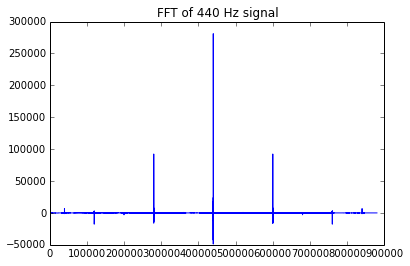

In [207]:
textToSound('no fish') #test of full program

In [ ]:
def analogToSound(analogSignal): #TEMP
    wave, fs = bytesToWave(bytes) #works. outputs array of points in the wave(???) and plots said array
    return Audio(np.asarray(soundbytes), rate=fs)